# Learning MNIST & Fashion

In this exercise you will design a classifier for the very simple but very popular [MNIST dataset](http://yann.lecun.com/exdb/mnist/), a classic of dataset in computer vision and one of the first real world problems solved by neural networks.

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical

Keras provides access to a few simple datasets for convenience in the `keras.datasets` module. Here we will load MNIST, a standard benchmark dataset for image classification. This will download the dataset if you have run this code before.

In [40]:
# 1d dimensional
# a = np.array([1, 2, 3])
# table, rows x columns
# a = np.array([[1, 2, 3]])
# 3d array
a = np.array([[[1], [2], [3]],
             [[4], [5], [6]]])
a.shape

(2, 3, 1)

In [41]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape

4423680/4422102 [==============================] - 5s 1us/step


(60000, 28, 28)

MNIST is a simple dataset of grayscale hand-written digits 28x28 pixels big. So there are 10 classes in the dataset corresponding to the digits 0-9. We can get a sense for what this dataset is like (always a good idea) by looking at some random samples for the training data:

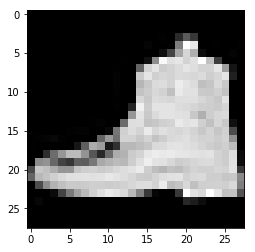

In [42]:
plt.imshow(X_train[np.random.randint(len(X_train))], cmap='gray')

We need to do a little preprocessing of the dataset. Firstly, we will flatten the 28x28 images to a 784 dimensional vector. This is because our first model below does not care about the spatial dimensions, only the pixel values. The images are represented by numpy arrays of integers between 0 and 255. Since this is a fixed range, we should scale the values down to be from 0 to 1. This normalization simplifies things is usually a good idea, especially since weights are usually initialized randomly near zero.

Read the code below and make sure you understand what we are doing to the data.

In [43]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


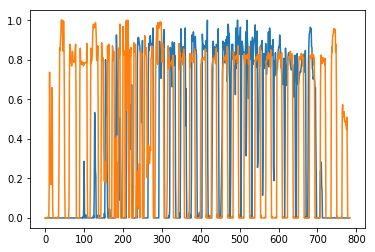

In [44]:
plt.plot(X_train[0])
plt.plot(X_train[1])

In [45]:
# 1-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

## Exercise 1 - design a fully conncted network for MNIST

Build a fully connected network. It is up to you what the structure of the model will be, but keep in mind that this problem is much higher dimensional than previous problems we have worked on. This is your first chance to design a model on real data! See if you can get 90% accuracy or better.

Here are some of the things you will need to decide about your model:
* number of layers
* activation function
* number of dimensions in each layer
* batch size
* number of epochs
* learning rate

Suggestions:
* You can pass the argument `verbose=2` to the `model.fit` method to quiet the output a bit, which will speed up the training as well.
* You already divided the training and test data, but since you will be trying a series of experiments and changing your model, it is good practice to set aside a **validation** dataset for you to use to track your model improvements. You should only use the test data after you believe you have a good model to evaluate the final performance. Keras can create a validation set for you if you pass the `validation_split=0.1` argument to `model.fit` to tell Keras to hold out 10% of the training data to use as validation.
* You can use the `plot_loss` if you find it useful in setting your learning rate etc. during your experiments.
* You can refer to previous notebooks and the [documentation](http://keras.io/models/sequential/).

If you want to talk over design decisions, feel free to ask.

In [6]:
def plot_loss(hist):
    loss = hist.history['loss']
    plt.plot(range(len(loss)), loss)
    plt.title('loss')
    plt.xlabel('epochs')

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [47]:
# TODO: design network
model = Sequential([
#     Dense(10, input_shape=(784,), activation='softmax')
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])

# model.add(Dense(4, input_dim=784, activation='tanh'))
# model.add(Dense(3, activation='tanh'))
# model.add(Dense(10, activation='sigmoid'))

# model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
# TODO: how did we know categorical_crossentropy?
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train_cat, epochs=2)#, verbose=2, validation_split=0.1)
h = model.fit(X_train, y_train_cat, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 130us/step - loss: 0.4757 - acc: 0.8307
Epoch 2/3
60000/60000 [==============================] - 8s 135us/step - loss: 0.3598 - acc: 0.8688
Epoch 3/3
60000/60000 [==============================] - 8s 130us/step - loss: 0.3231 - acc: 0.8821


In [48]:
# Final test evaluation
score = model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3549132198691368
Test accuracy: 0.8705


In [49]:
import pandas as pd

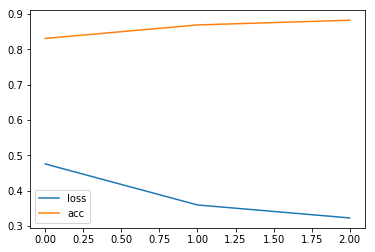

In [50]:
pd.DataFrame(h.history).plot()

## Exercise 2: Fashion Mnist
Repeat the classification exercise using the Fashion Mnist dataset from Zalando Research:

https://github.com/zalandoresearch/fashion-mnist

This dataset has the same specs as MNIST but it's designed to be more indicative of a real image classification problem. It contains 10 classes of clothing items:

    Label	Description
     0	     T-shirt/top
     1	     Trouser
     2	     Pullover
     3	     Dress
     4	     Coat
     5	     Sandal
     6	     Shirt
     7	     Sneaker
     8	     Bag
     9	     Ankle boot

Do you get to similar performance?